In [2]:
import psycopg2
from sklearn import svm
import pandas.io.sql as psql
import psycopg2
import re
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import grid_search
import xgboost as xgb
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [3]:
import json
with open('/Users/krishna/MOOC/smart-city/login.json') as data_file:
    db = json.load(data_file)

conn = psycopg2.connect(database=db['dbname'], user=db['user'], password=db['password'], host=db['host'], port=db['port'])

(41815, 3)


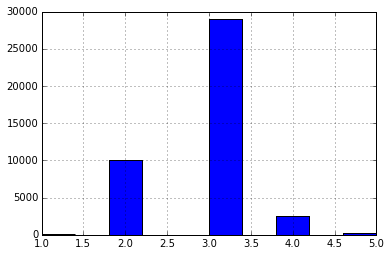

In [35]:
%matplotlib inline
dataframe1 = psql.frame_query("select idd, text, round(2*alch_score +3) as score from twitter.tweets where   alch_score is not null ;", conn)
dataframe1['score'].hist()
print dataframe1.shape

(12835, 3)


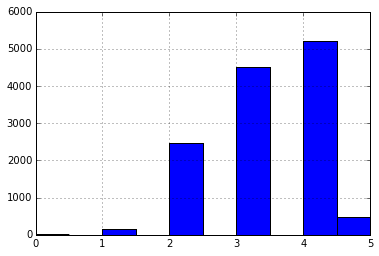

In [25]:
dataframe2 = psql.frame_query("select idd, text, local_score as score from twitter.tweets where   local_score is not null ;", conn)
dataframe2['score'].hist()
print dataframe2.shape

In [60]:
def processTweet(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+',' ',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

In [61]:
dataframe['text']= dataframe['text'].apply(lambda x : processTweet(x))
dataframe['avg'] = dataframe.apply(lambda x : round((x['alch_score_norm'] + x['local_score'])/2) ,axis=1)

In [62]:
train_data, test_data = train_test_split(dataframe, test_size = 0.2)

In [63]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 1.0,
                             sublinear_tf=True,
                             use_idf=True)
train_vectors = vectorizer.fit_transform(train_data['text'])
test_vectors = vectorizer.transform(test_data['text'])

In [64]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier 
clf1 = RandomForestClassifier(n_estimators=50)
forest = clf1.fit(train_vectors, train_data['avg'])

In [65]:
parameters = {'kernel':('linear', 'rbf'), 'C':[.1, 10]}
svr = svm.SVC()
clf2 = grid_search.GridSearchCV(svr, parameters)
clf2.fit(train_vectors, train_data['avg'])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [66]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('rf', clf1),('svm',clf2) ], voting='soft')
eclf1 = eclf1.fit(train_vectors, train_data['avg'])
predict = forest.predict(test_vectors)
cm  = (confusion_matrix(test_data['avg'], predict))
print cm
print "Correctly Classified",cm.trace()
print "Total data point ",cm.sum()
print "F1 score" ,f1_score(test_data['avg'], clf1.predict(test_vectors), average="macro")
#eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

[[ 1  4  0  1  0]
 [ 0 97  1 10  0]
 [ 0 19 33  5  0]
 [ 0 26  5 81  0]
 [ 0  2  0  1  2]]
Correctly Classified 214
Total data point  288
F1 score 0.614776785714


##### Save Model

In [44]:
joblib.dump(vectorizer, "ModelObjects/tfidf1500.pkl") 

['ModelObjects/tfidf1500.pkl',
 'ModelObjects/tfidf1500.pkl_01.npy',
 'ModelObjects/tfidf1500.pkl_02.npy']

In [45]:
joblib.dump(clf1, "ModelObjects/modelrfsvm.pkl") 

['ModelObjects/modelrfsvm.pkl',
 'ModelObjects/modelrfsvm.pkl_01.npy',
 'ModelObjects/modelrfsvm.pkl_02.npy',
 'ModelObjects/modelrfsvm.pkl_03.npy',
 'ModelObjects/modelrfsvm.pkl_04.npy',
 'ModelObjects/modelrfsvm.pkl_05.npy',
 'ModelObjects/modelrfsvm.pkl_06.npy',
 'ModelObjects/modelrfsvm.pkl_07.npy',
 'ModelObjects/modelrfsvm.pkl_08.npy',
 'ModelObjects/modelrfsvm.pkl_09.npy',
 'ModelObjects/modelrfsvm.pkl_10.npy',
 'ModelObjects/modelrfsvm.pkl_11.npy',
 'ModelObjects/modelrfsvm.pkl_12.npy',
 'ModelObjects/modelrfsvm.pkl_13.npy',
 'ModelObjects/modelrfsvm.pkl_14.npy',
 'ModelObjects/modelrfsvm.pkl_15.npy',
 'ModelObjects/modelrfsvm.pkl_16.npy',
 'ModelObjects/modelrfsvm.pkl_17.npy',
 'ModelObjects/modelrfsvm.pkl_18.npy',
 'ModelObjects/modelrfsvm.pkl_19.npy',
 'ModelObjects/modelrfsvm.pkl_20.npy',
 'ModelObjects/modelrfsvm.pkl_21.npy',
 'ModelObjects/modelrfsvm.pkl_22.npy',
 'ModelObjects/modelrfsvm.pkl_23.npy',
 'ModelObjects/modelrfsvm.pkl_24.npy',
 'ModelObjects/modelrfsvm.pkl_25